In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Dataset

In [2]:
df_mpg = sns.load_dataset('mpg')
df_mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [3]:
df_mpg.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [4]:
df_mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [5]:
df_mpg['origin'].unique()

array(['usa', 'japan', 'europe'], dtype=object)

In [6]:
from sklearn.model_selection import train_test_split

X = df_mpg.drop('mpg', axis=1)
y = df_mpg['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

In [7]:
df_mpg_train = pd.concat([X_train, y_train], axis=1)
df_mpg_test = pd.concat([X_test, y_test], axis=1)

In [8]:
num_cols = ['cylinders',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'model_year']

ctg_cols = ['origin', 'name']

In [28]:
enumerate(num_cols)

['cylinders',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'model_year']

In [33]:
a = np.array([[9,1,1], [2,2,2]])
a.flatten()

array([9, 1, 1, 2, 2, 2])

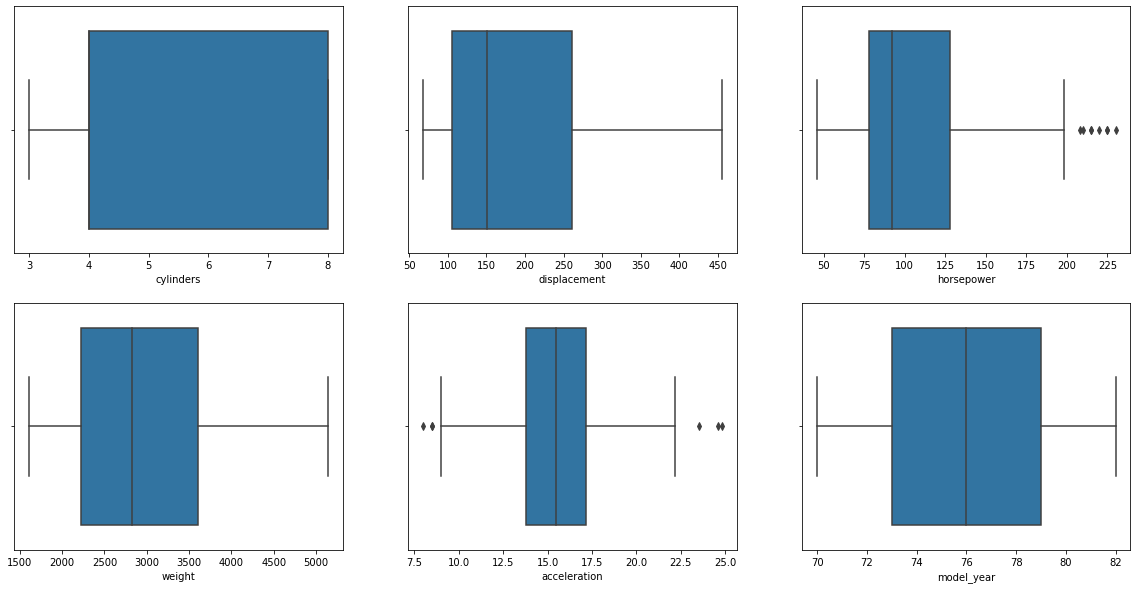

In [41]:
fig, ax = plt.subplots(2,3, figsize=(20,10))

for ix, col in enumerate(num_cols):
    sns.boxplot(x=col, data=X_train, ax=ax.flatten()[ix])

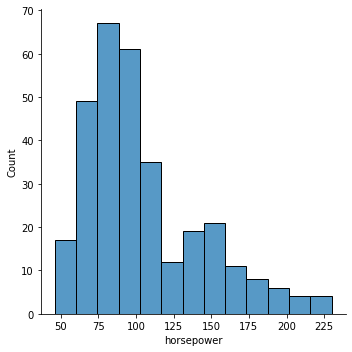

In [60]:
sns.displot(df_mpg_train['horsepower'])

<AxesSubplot:xlabel='mpg'>

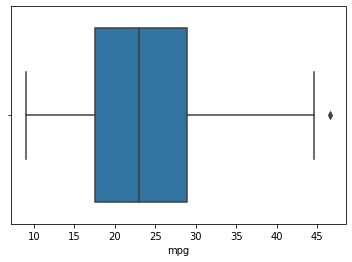

In [42]:
sns.boxplot(x='mpg', data=df_mpg_train)

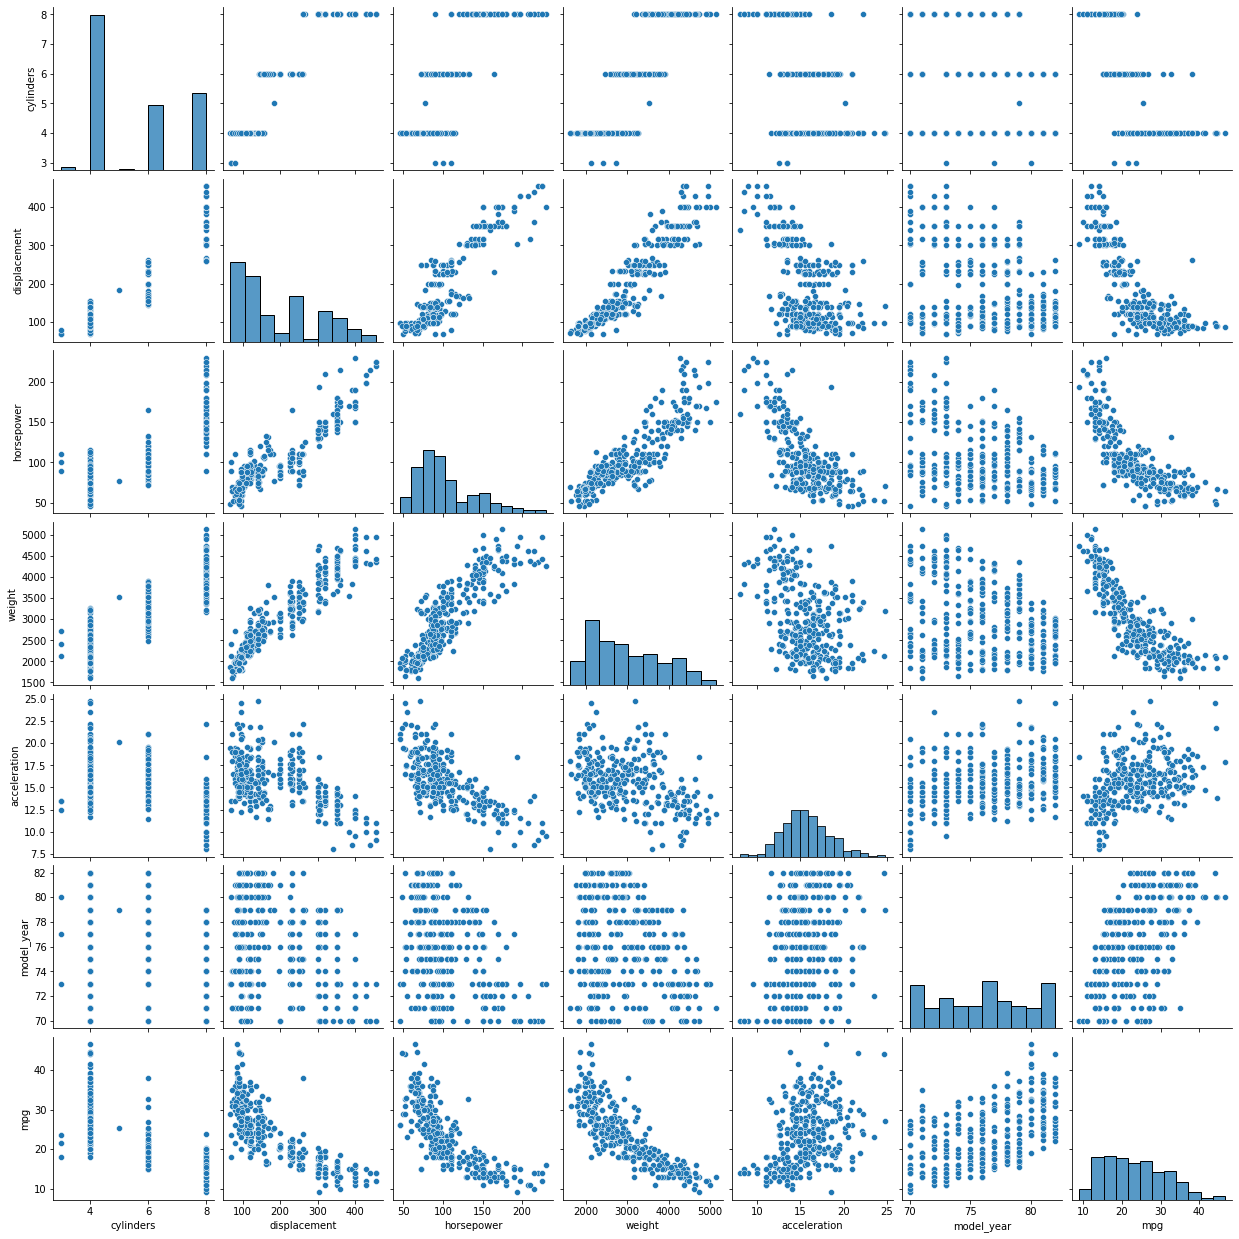

In [44]:
sns.pairplot(df_mpg_train[num_cols + ['mpg']])

<AxesSubplot:>

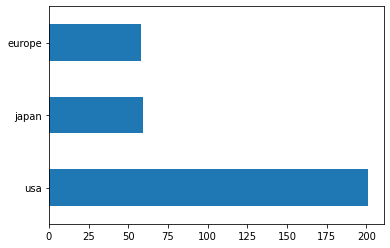

In [49]:
df_mpg_train['origin'].value_counts().plot(kind='barh')

<AxesSubplot:>

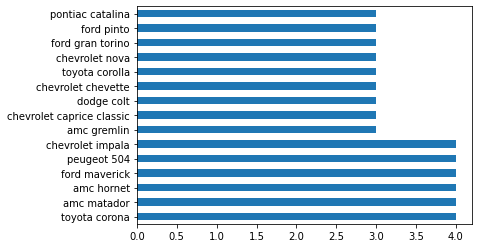

In [55]:
df_mpg_train['name'].value_counts()[:15].plot(kind='barh')

'name' won't be used as the value will be relatively unique for every data point.

# Preparation

- missing values
    - horsepowers
    
- scaling
    - robust 
    
- encoding
    - origin: onehot

In [84]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, OneHotEncoder

# impute missing horsepower
horsepower_median_train = X_train['horsepower'].median()
X_train['horsepower'].fillna(value=horsepower_median_train, inplace=True)
X_test['horsepower'].fillna(value=horsepower_median_train, inplace=True)

# scaling
scaler = RobustScaler()
X_train_num_scaled = scaler.fit_transform(X_train[num_cols])
X_test_num_scaled = scaler.transform(X_test[num_cols])

# encoding
encoder = OneHotEncoder()
X_train_ctg_encoded = encoder.fit_transform(np.array(X_train['origin']).reshape(-1,1)).toarray()
X_test_ctg_encoded = encoder.transform(np.array(X_test['origin']).reshape(-1,1)).toarray()

C:\ProgramData\Miniconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [86]:
X_train_prep = np.concatenate([X_train_num_scaled, X_train_ctg_encoded], axis=1)
X_test_prep = np.concatenate([X_test_num_scaled, X_test_ctg_encoded], axis=1)

In [ ]:
# univariate feature selection
# model-based feature selection
# iterative feature selection

- regression, continuous --> f_regression
- regression, categorical --> mutual_info_regression
- classification, continuous --> f_classif
- classification, categorical --> chi2

## Univariate Statistics Feature Selection

In [115]:
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_regression, mutual_info_regression

X_train_prep_num = X_train_prep[:, :6]
X_train_prep_ctg = X_train_prep[:, 6:]

# select 3 cont. features
k_feature_selector = SelectKBest(score_func=f_regression, k=3)
k_feature_selector.fit(X_train_prep_num, y_train)
X_train_prep_num_selected = k_feature_selector.transform(X_train_prep_num)

# select ctg. features
k_feature_selector_ctg = SelectKBest(score_func=mutual_info_regression, k=1)
k_feature_selector_ctg.fit(X_train_prep_ctg, y_train)
X_train_prep_ctg_selected = k_feature_selector_ctg.transform(X_train_prep_ctg)

In [ ]:
# X_train_prep_best = np.concatenate([X_train_prep_num_selected, X_train_prep_ctg_selected], axis=1)

## Model-based Feature Selection

In [119]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train_prep, y_train)
lin_reg.score(X_train_prep, y_train)

0.832889019287643

In [126]:
encoder.categories_[0].tolist()

['europe', 'japan', 'usa']

<AxesSubplot:xlabel='coef_abs', ylabel='feature'>

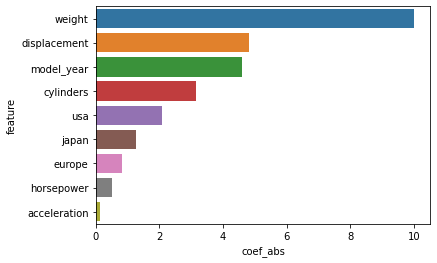

In [132]:
df_coef = pd.DataFrame({
    'feature': num_cols + encoder.categories_[0].tolist(),
    'coef': lin_reg.coef_
})

df_coef['coef_abs'] = df_coef['coef'].apply(abs)

sns.barplot(x='coef_abs', y='feature', data=df_coef.sort_values(by='coef_abs', ascending=False))

In [133]:
best_features = df_coef.sort_values(by='coef_abs', ascending=False)[:3]
best_features

,feature,coef,coef_abs
3,weight,-10.015852,10.015852
1,displacement,4.823590,4.823590
5,model_year,4.587200,4.587200


## Iterative Feature Selection

### Backward

In [149]:
from sklearn.feature_selection import RFE

lin_reg = LinearRegression()
backward_selector = RFE(lin_reg, n_features_to_select=5)
backward_selector.fit(X_train_prep, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=5)

In [150]:
num_cols + encoder.categories_[0].tolist()

['cylinders',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'model_year',
 'europe',
 'japan',
 'usa']

In [151]:
backward_selector.get_support()

array([ True,  True, False,  True, False,  True, False, False,  True])

- cylinder
- displacement
- weight
- model_year
- usa